# LHCb Quantum Compuing Workshop - Introduction to Qiskit 
# Day 1 
The purpose of this notebook is to allow you to explore Qiskit and try out building basic circuits and evaluate solutions. You will also visualise different outcomes in differnet ways. You will learn to execute the circuits on different backends (simulators and real quantum computers!)

There will be a few examples to help you out. You then need to try to answer the questions using what you learned in the lectures.

There will be a total of 8 questions for you to solve. It is perfectly fine if you don't get to finish all of them. You can go at your own pace, explore, and enjoy all Qiskit has to offer. A notebook with the model answers for all the questions will be posted shortly after today's session. 

Have fun!

### **Tip:**  
Try to draw the circuit or simulate it in Qiskit to help visualize what is happening at each step. Use the provided examples as templates for building and analysing your own circuits.

# Setup

In [1]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit_aer --quiet

In [2]:
import qiskit
print(qiskit.__version__)


2.0.1


## Examples 1



### **About Quantum Circuits:**  
A quantum circuit is a sequence of quantum gates applied to qubits. In Qiskit, you can create circuits, add gates, and visualize them. The qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left). The state of the qubits evolves as gates are applied from left to right. 


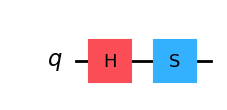

In [3]:
from qiskit import QuantumCircuit

# Example 1: Create a simple quantum circuit with a Hadamard gate and a phase gate

qc_example1_1 = QuantumCircuit(1)
qc_example1_1.h(0)
qc_example1_1.s(0)
qc_example1_1.draw('mpl')


### **Statevector Simulation:**  
The statevector simulator allows you to see the exact quantum state of your circuit after applying gates. This is useful for understanding how gates transform the state of your qubits. The output is a vector of complex numbers representing the amplitudes of each basis state.

In [4]:
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

backend_example1_1 = Aer.get_backend('statevector_simulator') # the device to run on (simulator)
result1_1 = backend_example1_1.run(qc_example1_1).result() # run the circuit
psi1_1 = result1_1.get_statevector(qc_example1_1) # get the state vector of the circuit
array_to_latex(psi1_1) # display the state vector in LaTeX format

<IPython.core.display.Latex object>

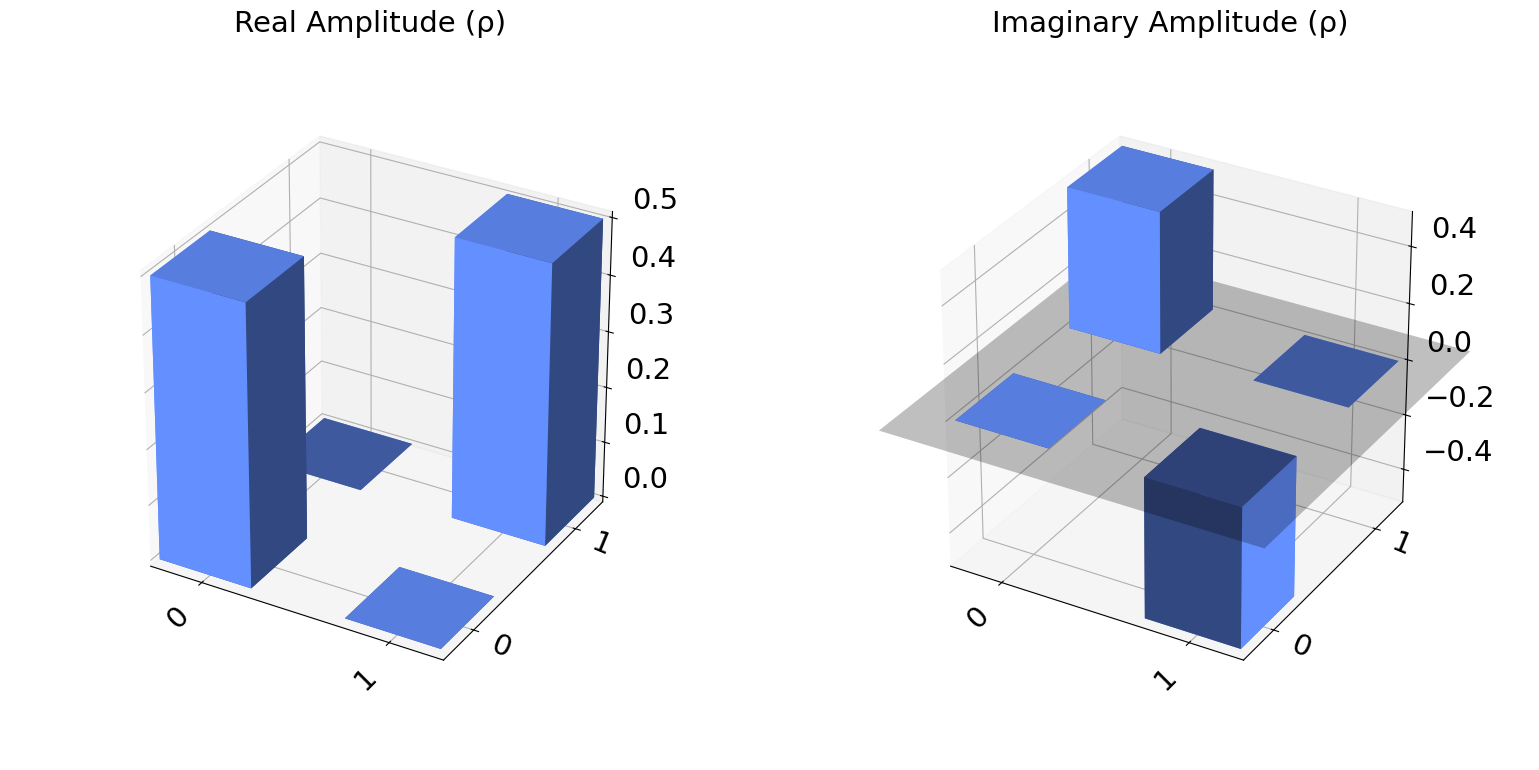

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(psi1_1)

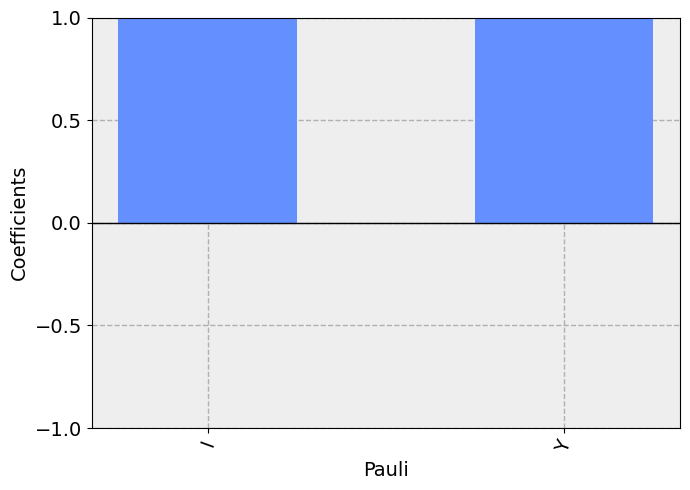

In [6]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(psi1_1)

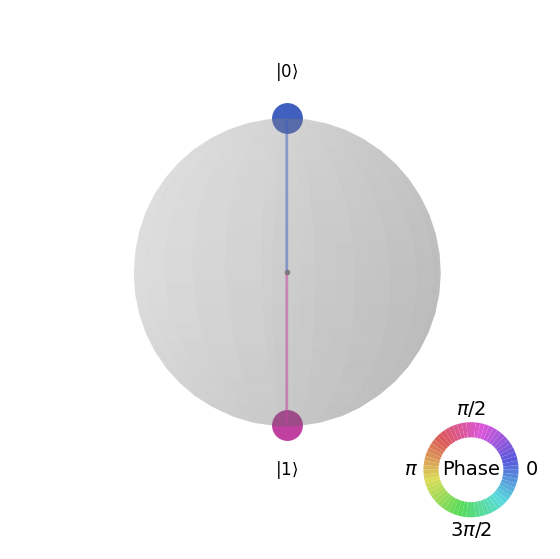

In [7]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(psi1_1)

### **Bell States:**  
Bell states are special two-qubit states that are maximally entangled. Creating a Bell state involves putting one qubit into superposition (using a Hadamard gate) and then entangling it with another qubit using a CNOT gate.

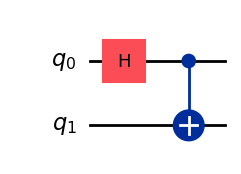

In [8]:
# Example 1.2: Creating a Bell state

qc_example1_2 = QuantumCircuit(2)
# Add a H gate on qubit 0, putting this qubit in superposition.
qc_example1_2.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc_example1_2.cx(0,1)
qc_example1_2.draw('mpl')

In [9]:
backend_example1_2 = Aer.get_backend('statevector_simulator') # the device to run on (simulator)
result1_2 = backend_example1_2.run(qc_example1_2).result() # run the circuit
psi1_2 = result1_2.get_statevector(qc_example1_2) # get the state vector of the circuit
array_to_latex(psi1_2) # display the state vector in LaTeX format

<IPython.core.display.Latex object>

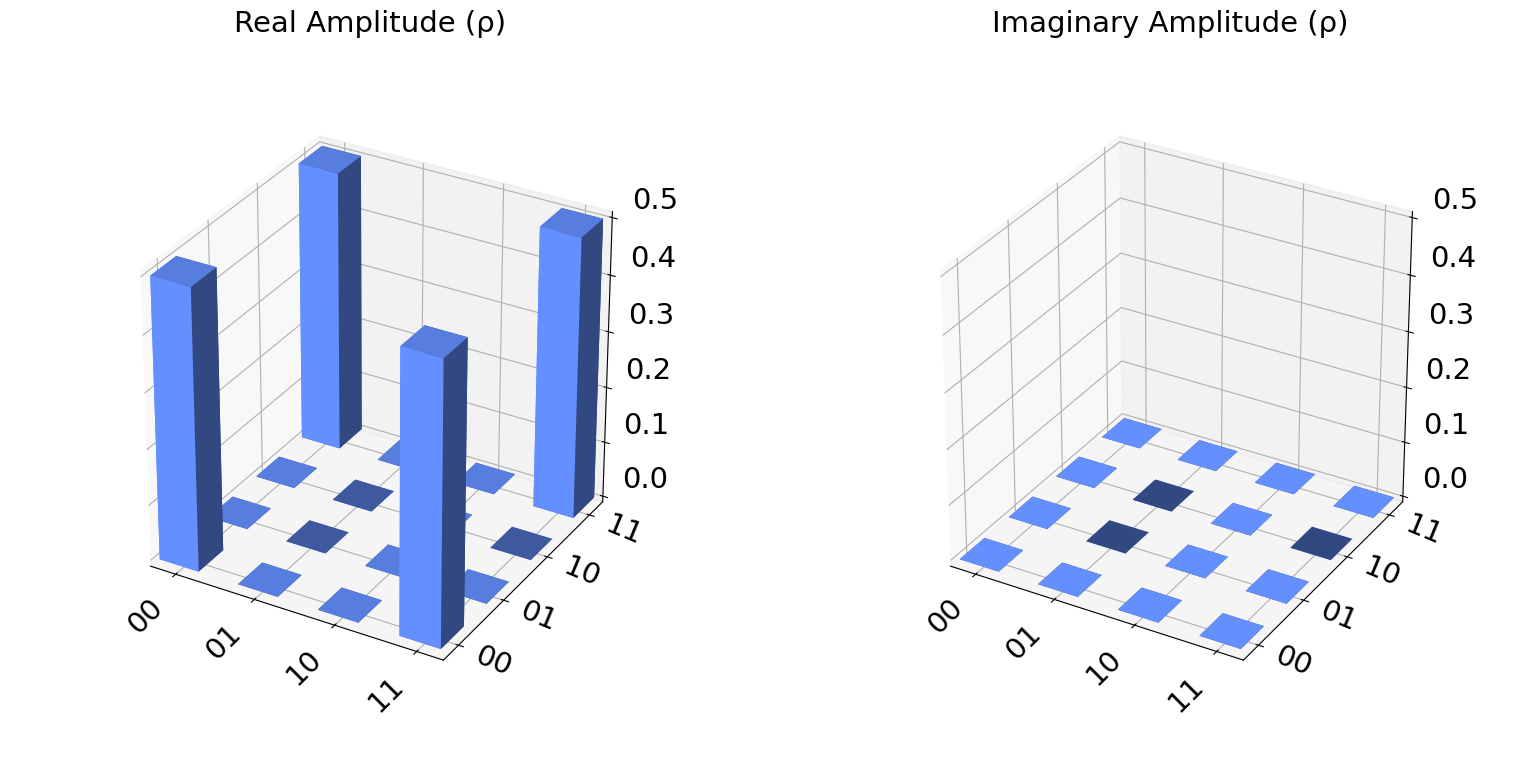

In [10]:
plot_state_city(psi1_2)

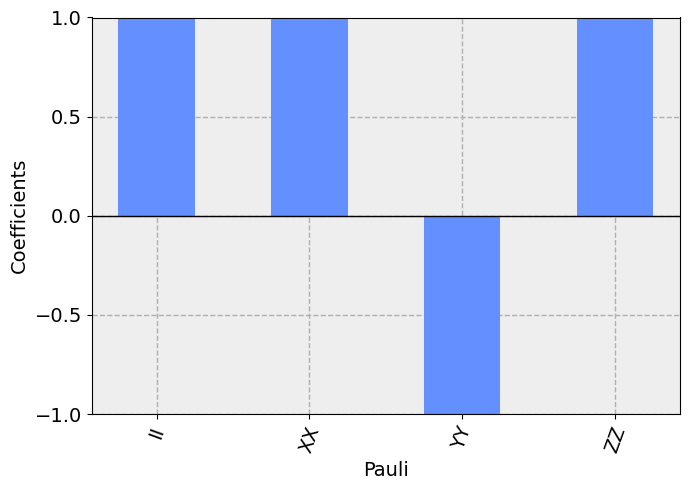

In [11]:

plot_state_paulivec(psi1_2)

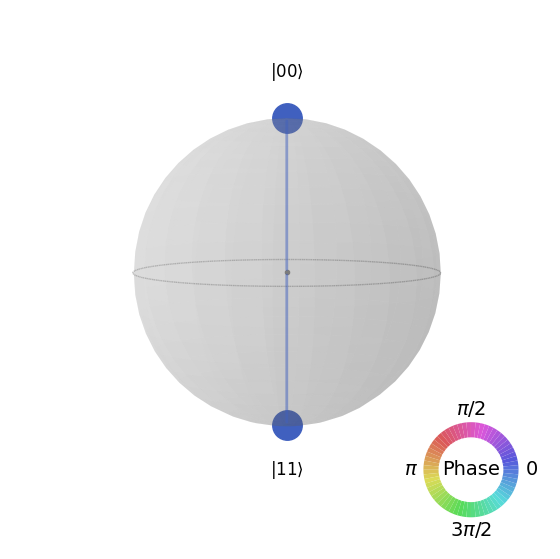

In [12]:
plot_state_qsphere(psi1_2)

## Question 1
**What is the output of the following circuit given the initial state $| 0 \rangle$ ?**

<img src="Photos/q1_circuit.png" align = "left" width="300"/>

**a)** $| 0 \rangle$

**b)** $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$

**c)** -$\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

**d)** Both 2 & 3 are possible

**e)** None of the above

## Question 2

**What is the output of the last Bell state ( $| \psi^{11} \rangle$) followed by an S gate on qubit 0?** 


**a)** $\frac{i| 01 \rangle - | 10 \rangle}{\sqrt{2}}$

**b)** $\frac{| 01 \rangle - | 10 \rangle}{\sqrt{2}}$

**c)** $\frac{i| 01 \rangle + | 10 \rangle}{\sqrt{2}}$

**d)** $\frac{| 01 \rangle + | 10 \rangle}{\sqrt{2}}$

**e)** None of the above

## Question 3

**Consider the three-qubit quantum circuit below. What are the real and imaginary components of the state vector?** 

<img src="Photos/q3_circuit.png" align = "left" width="300"/>

**1)** <img src="Photos/q3_a1.png" width="800"/>

**2)** <img src="Photos/q3_a2.png" width = "800"/>

**3)** <img src="Photos/q3_a3.png" width = "800"/>

**4)** <img src="Photos/q3_a4.png" width = "800"/>

**5)** None of the above

## Examples 2

### **Measurement in Quantum Circuits:**  
To extract information from qubits, you need to measure them. Measurement collapses the quantum state into one of the basis states, and the result is stored in classical bits. By running the circuit many times (shots), you can estimate the probabilities of different outcomes.

### **Interpreting Histograms:**  
The histogram shows the frequency of each measurement outcome over many runs. This helps you understand the probability distribution of the quantum state after measurement.


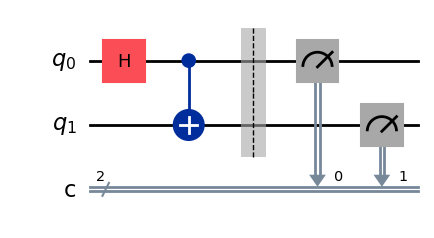

In [13]:
qc_example = QuantumCircuit(2,2) #first number corresponds to qubits, second number corresponds to classical bits (for measurement)
qc_example.h(0)
qc_example.cx(0,1)
qc_example.barrier()
qc_example.measure([0,1],[0,1])
qc_example.draw('mpl')

{'11': 1007, '00': 993}


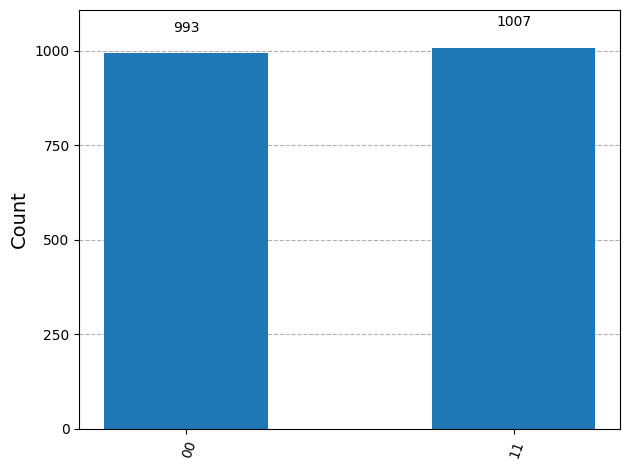

In [14]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
job = backend.run(qc_example, shots = 2000) # this runs the experiment, shots is the number of times we run the circuit

result = job.result() # get the result of the experiment
counts = result.get_counts() # get the counts of the results
print(counts)

plot_histogram(counts)

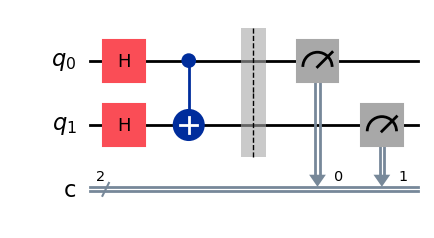

In [15]:
qc_example2 = QuantumCircuit(2,2) #first number corresponds to qubits, second number corresponds to classical bits (for measurement)
qc_example2.h(0)
qc_example2.h(1)
qc_example2.cx(0,1)
qc_example2.barrier()
qc_example2.measure([0,1],[0,1])
qc_example2.draw('mpl')

{'01': 497, '10': 516, '00': 465, '11': 522}


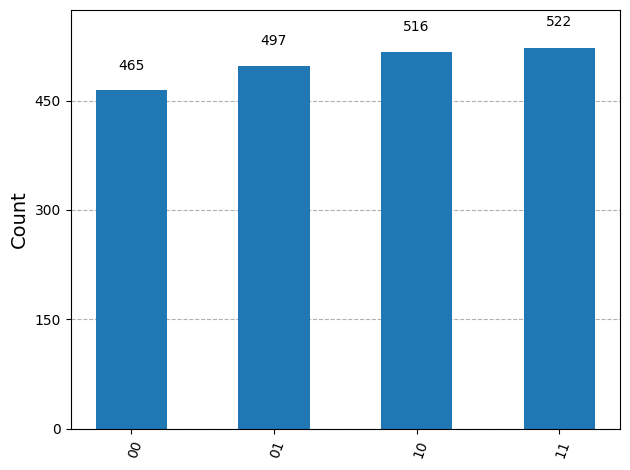

In [16]:
backend = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
job = backend.run(qc_example2, shots = 2000) # this runs the experiment

result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

## Question 4

**What is the result of the measurements in the following circuit assuming error-free quantum computation?** 

<img src="Photos/q4_circuit.png" align = "left" width="400"/>

**a)** 50% 000 and 50% 111

**b)** 12.5% for all 8 states

**c)** 25% 000,   25% 001,   25% 110,   25% 111

**d)** 100% 000

**e)** 25% 000,   25% 011,   25% 100,   25% 111

## Question 5

**Noise Simulation in Quantum Circuits**

Quantum computers are subject to noise, which can affect the outcome of computations. Qiskit allows you to simulate noise using built-in noise models.

**Task:**  
Create a single-qubit circuit that applies a Hadamard gate to a qubit initialized in $|0\rangle$, then measures the qubit.  
1. Run the circuit on the ideal simulator (`Aer.get_backend('aer_simulator')`) and plot the measurement histogram.
2. Run the same circuit on a noisy simulator using an **amplitude damping noise model** (you can use `qiskit_aer.noise.NoiseModel` and `qiskit_aer.noise.amplitude_damping_error`).
3. Compare the results. How does the measurement histogram change due to noise?

*Hint: Amplitude damping simulates energy relaxation (T1 decay), which causes qubits to relax from $|1\rangle$ to $|0\rangle$ over time. See the [Qiskit documentation](https://quantum.cloud.ibm.com/docs/en/guides/build-noise-models) for more details.*

---

**a)** The histogram remains unchanged  
**b)** The histogram shows more randomness due to noise  
**c)** The histogram shows a bias toward $|0\rangle$  
**d)** The histogram shows only $|1\rangle$  
**e)** None of the above

## Question 6

**What is the result of the measurements in the following circuit assuming error-free quantum computation?** 

*Note: You can use for loops to make creating this circuit much easier and efficient

<img src="Photos/q6_circuit.png" align = "left" width="700"/>

**a)** 50% 00000, 11111

**b)** 50% 01111, 10000

**c)** 3.125% for all 32 bits (2^5)

**d)** 100% 00000

**e)** 100% 11111

### **Combining Circuits**
Qiskit allows you to combine smaller circuits into larger ones. This is useful for building complex algorithms from simpler building blocks.


## Question 7

**How do you merge the lhs and rhs circuits to form the final circuit?** 

<img src="Photos/q7_circuit.png" align = "left" width="700"/>

**a)** `lhs.append(rhs)`

**b)** `lhs.combine(rhs)`

**c)** `lhs.compose(rhs)`

**d)**  `lhs+rhs`

**e)**  None of the above

### **Managing Jobs on Backends:**  
When you run circuits on a backend (simulator or real quantum computer), each run is stored as a "job". You can retrieve information about past jobs, including results and status.


## Question 8

**How do you retrieve the last run job from a backend?** 

**1)** `backend.jobs()[0]`

**2)** `backend.jobs()[-1]`

**3)** `backend.retrieve_job()[0]`

**4)** `backend.retrieve_job()[-1]`

**5)** None of the above

### **Toffoli (CCX) Gate:**  
The Toffoli gate is a three-qubit gate that flips the target qubit if both control qubits are in the |1⟩ state. It is a universal gate for reversible classical computation and is often used in quantum algorithms.


## Question 9

**Suppose you have a 3-qubit quantum circuit and you apply a Toffoli gate with the first and second qubits as controls and the third qubit as the target. Which of the following is equivalent to the Toffoli gate?**

**1)** H gate on the first qubit, followed by a CX gate on the second and third qubits, followed by a Z gate on the first qubit

**2)** CZ gate on the first and second qubits, followed by a NOT gate on the third qubit

**3)** CX gate on the first and second qubits, followed by a Z gate on the third qubit

**4)** H gate on the first qubit, followed by a CX gate on the first and second qubits, followed by a H gate on the first qubit

**5)** None of the above


## Question 10

**Write a program from scratch that creates the GHZ state (on three qubits),**

$$
|GHZ\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)
$$

**performs a measurement with 2000 shots, and returns the measurement results as a histogram.**

**What should you expect to see in the measurement histogram for the GHZ state?**

**a)** Only the outcome `000` appears.

**b)** Only the outcome `111` appears.

**c)** Both `000` and `111` appear with roughly equal probability.

**d)** All possible 3-bit outcomes appear with equal probability.

**e)** The outcome `001` appears most frequently.